## Generating a Second Order Autoregressive Process

In [62]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from kf import kf

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 10,
    # # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

Text(0.5, 1, 'Autoregressive Process')

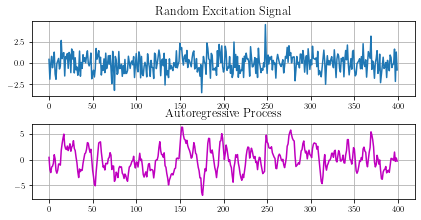

In [63]:
# Length of time series
#
N=400
# Gaussian random numbers as an excitation signal
#
ex = np.random.randn(N)
# Second order AR Process
#
a = np.array([1.2, -0.4])
S1 = ex.copy()
for n in range(2, N):
    x = np.array([S1[n-1], S1[n-2]])
    S1[n] = np.dot(x, a) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,3))
plt.tight_layout()
ax[0].plot(range(N), ex)
ax[0].grid(True)
ax[0].set_title("Random Excitation Signal")
ax[1].plot(range(N), S1, color='m')
ax[1].grid(True)
ax[1].set_title("Autoregressive Process")

In [64]:
fig.savefig('report/Figures/stationary_ar.pdf')

Text(0.5, 1, 'Time Varying Autoregressive Process')

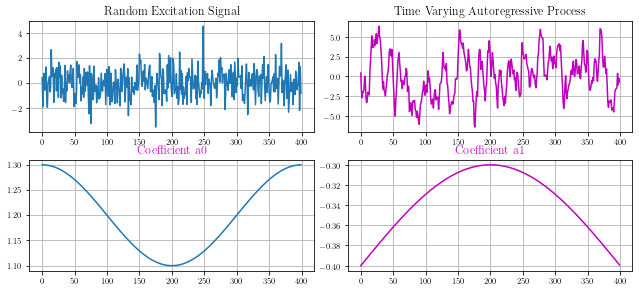

In [65]:
# Second order AR Process with coefficients slowly changing in time
#
a0 = np.array([1.2, -0.4])
A  = np.zeros((N,2))
omega, alpha = N/2, 0.1
for n in range(N):
    A[n,0] = a0[0] + (alpha * np.cos(2*np.pi*n/N))
    A[n,1] = a0[1] + (alpha * np.sin(np.pi*n/N))
S2 = ex.copy()
for n in range(2, N):
    x = np.array([S2[n-1], S2[n-2]])
    S2[n] = np.dot(x, A[n,:]) + ex[n]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,4))
plt.tight_layout()
ax[1,0].plot(range(N), A[:,0])
ax[1,0].grid(True)
ax[1,0].set_title("Coefficient a0", color='m')
ax[1,1].plot(range(N), A[:,1], color='m')
ax[1,1].grid(True)
ax[1,1].set_title("Coefficient a1", color='m')
ax[0,0].plot(range(N), ex)
ax[0,0].grid(True)
ax[0,0].set_title("Random Excitation Signal")
ax[0,1].plot(range(N), S2, color='m')
ax[0,1].grid(True)
ax[0,1].set_title("Time Varying Autoregressive Process")
# plt.savefig("arChange.png")

In [66]:
fig.savefig('report/Figures/non-stationary_ar.pdf')

## Kalman Filter Estimates of Second Order AR Parameters

## Five different initial conditions

Theta

1. np.random.rand(2, 1)

2. np.zeros((2, 1))

3. np.array([[100], [100]], dtype='f')

4. np.array([[1.2], [-0.4]], dtype='f')

5. np.array([[-100], [-100]], dtype='f')

### Stationary

In [67]:
theta = [np.random.rand(2, 1), np.zeros((2, 1)), np.array([[100], [100]], dtype='f'), np.array([[1.2], [-0.4]], dtype='f'), np.array([[-100], [-100]], dtype='f')]
P = 0.001 * np.eye(2)

R = np.var(S1)
beta = 0.01

thetaIter = []
errorIter = []

for i in range(5):
    thetaTemp, errorTemp = kf(S1, theta[i], P, R, beta)
    thetaIter.append(thetaTemp)
    errorIter.append(np.abs(errorTemp))

Text(0.5, 0.98, 'Initial State: Stationary AR')

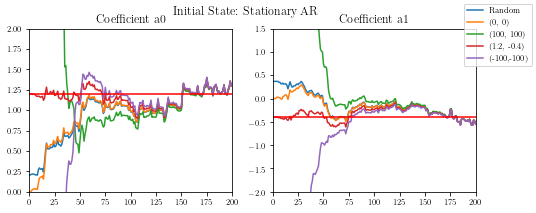

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(5):
    ax[0].plot(thetaIter[i][0])
ax[0].set_xlim(0, 200)
ax[0].set_ylim(0, 2)
ax[0].axhline(a[0], color='r')
ax[0].set_title('Coefficient a0')
for i in range(5):
    ax[1].plot(thetaIter[i][1])
ax[1].set_xlim(0,200)
ax[1].set_ylim(-2, 1.5)
ax[1].axhline(y=a[1], color='r')
ax[1].set_title('Coefficient a1')
fig.legend(['Random', '(0, 0)', '(100, 100)', '(1.2, -0.4)', '(-100,-100)'])
fig.suptitle('Initial State: Stationary AR')

In [69]:
fig.savefig('report/Figures/initial_stationary.pdf')

### Non-stationary

In [70]:
theta = [np.random.rand(2, 1), np.zeros((2, 1)), np.array([[100], [100]], dtype='f'), np.array([[1.2], [-0.4]], dtype='f'), np.array([[-100], [-100]], dtype='f')]
P = 0.001 * np.eye(2)

R = np.var(S2)
beta = 0.01

thetaIter = []

for i in range(5):
    thetaTemp, _ = kf(S2, theta[i], P, R, beta)
    thetaIter.append(thetaTemp)

Text(0.5, 0.98, 'Initial State: Non-stationary AR')

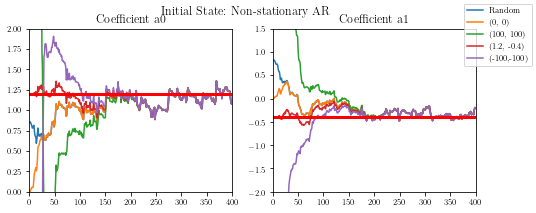

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(5):
    ax[0].plot(thetaIter[i][0])
ax[0].set_xlim(0,400)
ax[0].set_ylim(0, 2)
ax[0].axhline(y=a0[0], color='r', linewidth=3)
ax[0].set_title('Coefficient a0')
for i in range(5):
    ax[1].plot(thetaIter[i][1])
ax[1].set_xlim(0,400)
ax[1].set_ylim(-2, 1.5)
ax[1].axhline(y=a0[1], color='r', linewidth=3)
ax[1].set_title('Coefficient a1')
fig.legend(['Random', '(0, 0)', '(100, 100)', '(1.2, -0.4)', '(-100,-100)'])
fig.suptitle('Initial State: Non-stationary AR')

In [72]:
fig.savefig('report/Figures/initial_non-stationary.pdf')

P

1. 0.001I

2. np.var(ex)I

3. 1000I

4. 0

5. I

### Stationary

In [73]:
theta = np.random.rand(2, 1)
P = [0.001 * np.eye(2), np.var(ex) * np.eye(2), 1000 * np.eye(2), np.zeros((2, 2)), np.eye(2)]

R = np.var(S1)
beta = 0.01

thetaIter = []

for i in range(5):
    thetaTemp, _ = kf(S1, theta, P[i], R, beta)
    thetaIter.append(thetaTemp)

Text(0.5, 0.98, 'Initial State Covariance: Stationary AR')

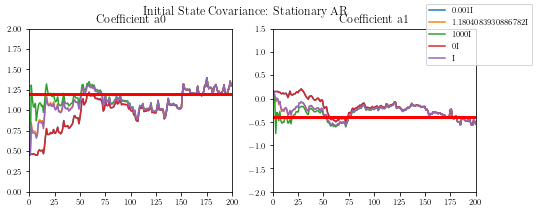

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(5):
    ax[0].plot(thetaIter[i][0])
ax[0].set_xlim(0,200)
ax[0].set_ylim(0, 2)
ax[0].axhline(y=a[0], color='r', linewidth=3)
ax[0].set_title('Coefficient a0')
for i in range(5):
    ax[1].plot(thetaIter[i][1])
ax[1].set_xlim(0,200)
ax[1].set_ylim(-2, 1.5)
ax[1].axhline(y=a[1], color='r', linewidth=3)
ax[1].set_title('Coefficient a1')
fig.legend(['0.001I', f'{np.var(ex)}I', '1000I', '0I', 'I'])
fig.suptitle('Initial State Covariance: Stationary AR')

In [75]:
fig.savefig('report/Figures/initial_cov_stationary.pdf')

## Process Noise Covariance, Q

### Stationary

In [76]:
theta = np.random.rand(2, 1)
P = 100 * np.eye(2)

R = np.var(S1)
beta = [0, 0.01, 0.5]

thetaIter = []
errorIter = []

for i in range(3):
    thetaTemp, errorTemp = kf(S1, theta, P, R, beta[i])
    thetaIter.append(thetaTemp)
    errorIter.append(errorTemp)

Text(0.5, 0.98, 'Process Noise Covariance: Stationary AR')

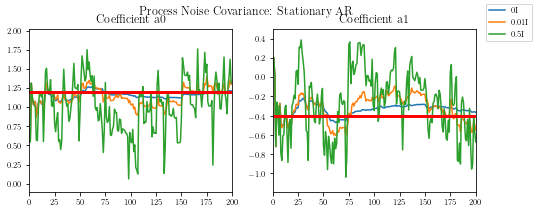

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(len(thetaIter)):
    ax[0].plot(thetaIter[i][0])

ax[0].set_xlim(0,200)
# ax[0].set_ylim(0, 2)
ax[0].axhline(y=a[0], color='r', linewidth=3)
ax[0].set_title('Coefficient a0')
for i in range(len(thetaIter)):
    ax[1].plot(thetaIter[i][1])
ax[1].set_xlim(0,200)
# ax[1].set_ylim(-2, 1.5)
ax[1].axhline(y=a[1], color='r', linewidth=3)
ax[1].set_title('Coefficient a1')
fig.legend(['0I', '0.01I', '0.5I'])
fig.suptitle('Process Noise Covariance: Stationary AR')

In [78]:
fig.savefig('report/Figures/process_noise.pdf')

In [79]:
np.var(errorIter, axis=1)

array([1.21409943, 1.31627492, 2.03686346])

### Non-stationary

In [80]:
theta = np.random.rand(2, 1)
P = 100 * np.eye(2)

R = np.var(S2)
beta = [0, 0.01]

thetaIter = []
errorIter = []

for i in range(len(beta)):
    thetaTemp, _ = kf(S2, theta, P, R, beta[i])
    thetaIter.append(thetaTemp)

Text(0.5, 0.98, 'Process Noise Covariance: Non-stationary AR')

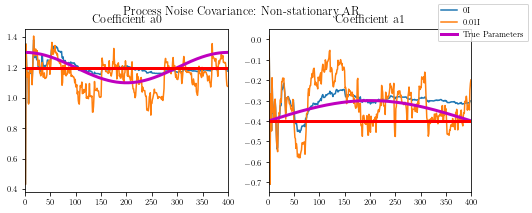

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(len(thetaIter)):
    ax[0].plot(thetaIter[i][0])
ax[0].plot(range(N), A[:,0], color='m', linewidth=3)
ax[0].set_xlim(0,400)
# ax[0].set_ylim(0.5, 1.5)
ax[0].axhline(y=a0[0], color='r', linewidth=3)
ax[0].set_title('Coefficient a0')
for i in range(len(thetaIter)):
    ax[1].plot(thetaIter[i][1])
ax[1].plot(range(N), A[:,1], color='m', linewidth=3)
ax[1].set_xlim(0,400)
# ax[1].set_ylim(-0.6, 0)
ax[1].axhline(y=a0[1], color='r', linewidth=3)
ax[1].set_title('Coefficient a1')
fig.legend(['0I', '0.01I', 'True Parameters'])
fig.suptitle('Process Noise Covariance: Non-stationary AR')

In [82]:
fig.savefig('report/Figures/process_noise_non-stationary.pdf')

## Observation Noise R

## Stationary

In [83]:
theta = np.random.rand(2, 1)
P = 100 * np.eye(2)

R = [0.01, np.var(S1), 10000]
beta = 0.001

thetaIter = []
errorIter = []

for i in range(len(R)):
    thetaTemp, errorTemp = kf(S1, theta, P, R[i], beta)
    thetaIter.append(thetaTemp)
    errorIter.append(errorTemp**2)

Text(0.5, 0.98, 'Observation Noise Variance: Stationary AR')

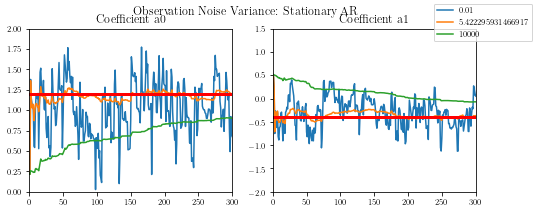

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(len(thetaIter)):
    ax[0].plot(thetaIter[i][0])

ax[0].set_xlim(0,300)
ax[0].set_ylim(0, 2)
ax[0].axhline(y=a[0], color='r', linewidth=3)
ax[0].set_title('Coefficient a0')
for i in range(len(thetaIter)):
    ax[1].plot(thetaIter[i][1])
ax[1].set_xlim(0,300)
ax[1].set_ylim(-2, 1.5)
ax[1].axhline(y=a[1], color='r', linewidth=3)
ax[1].set_title('Coefficient a1')
fig.legend([str(val) for val in R])
fig.suptitle('Observation Noise Variance: Stationary AR')

In [85]:
fig.savefig('report/Figures/observation_stationary.pdf')

### Non-stationary

In [86]:
theta = np.random.rand(2, 1)
P = 100 * np.eye(2)

R = [0.01, np.var(S2), 10000]
beta = 0.001

thetaIter = []
errorIter = []

for i in range(len(R)):
    thetaTemp, errorTemp = kf(S2, theta, P, R[i], beta)
    thetaIter.append(thetaTemp)
    errorIter.append(errorTemp**2)

Text(0.5, 0.98, 'Observation Noise Variance: Non-stationary AR')

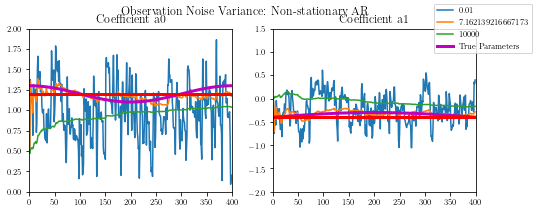

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
for i in range(len(thetaIter)):
    ax[0].plot(thetaIter[i][0])
ax[0].plot(range(N), A[:,0], color='m', linewidth=3)
ax[0].set_xlim(0,400)
ax[0].set_ylim(0, 2)
ax[0].axhline(y=a[0], color='r', linewidth=3)
ax[0].set_title('Coefficient a0')
for i in range(len(thetaIter)):
    ax[1].plot(thetaIter[i][1])
ax[1].plot(range(N), A[:,1], color='m', linewidth=3)
ax[1].set_xlim(0,400)
ax[1].set_ylim(-2, 1.5)
ax[1].axhline(y=a[1], color='r', linewidth=3)
ax[1].set_title('Coefficient a1')
fig.legend([str(val) for val in R]+['True Parameters'])
fig.suptitle('Observation Noise Variance: Non-stationary AR')

In [88]:
fig.savefig('report/Figures/observation_non-stationary.pdf')